# MULTIPLE LINEAR REGRESSION

<FONT COLOR='GREY'>__Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.__</FONT>

_DATASET - COVID14 INDIAN DATASET FROM KAGGLE<BR>
LIBRARIES - PANDAS, NUMPY, SEABORN, DATETIME, AND MATPLOTLIB<BR>
ALGORITHM - LINEAR REGRESSION AND MULTIPLE LINEAR REGRESSION_

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [51]:
## imparting main dataset
df = pd.read_csv('covid19.csv', parse_dates=['Date'], dayfirst=True)

In [52]:
df.head()

,Unnamed: 0,Date,State/UT,Latitude,Longitude,Confirmed,Active,Deaths,Mortality rate,Cured,Recovery rate
0,0,2020-01-30,Kerala,10.8505,76.2711,1,1,0,0.0,0,0.0
1,1,2020-01-31,Kerala,10.8505,76.2711,1,1,0,0.0,0,0.0
2,2,2020-02-01,Kerala,10.8505,76.2711,2,2,0,0.0,0,0.0
3,3,2020-02-02,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0
4,4,2020-02-03,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0


In [53]:
## keeping only required columns
df = df[['Date', 'State/UT','Cured','Deaths','Confirmed']]
## renaming column names
df.columns = ['date','state','cured','deaths','confirmed']

In [54]:
## looking at the earlier dates
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [55]:
# looking at the latest dates
df.tail()

,date,state,cured,deaths,confirmed
947,2020-04-15,Telengana,100,17,624
948,2020-04-15,Tripura,0,0,2
949,2020-04-15,Uttar Pradesh,50,5,660
950,2020-04-15,Uttarakhand,9,0,37
951,2020-04-15,West Bengal,37,7,213


In [56]:
# current date
today = df[df.date == '2020-04-15']

In [57]:
today.head()

,date,state,cured,deaths,confirmed
919,2020-04-15,Andaman and Nicobar Islands,10,0,11
920,2020-04-15,Andhra Pradesh,16,9,483
921,2020-04-15,Arunachal Pradesh,0,0,1
922,2020-04-15,Assam,0,1,32
923,2020-04-15,Bihar,29,1,66


In [58]:
#Sorting data w.r.t number of confirmed cases
max_confirmed_cases = today.sort_values(by='confirmed',ascending=False)
max_confirmed_cases.head()

,date,state,cured,deaths,confirmed
937,2020-04-15,Maharashtra,259,178,2687
926,2020-04-15,Delhi,30,30,1561
946,2020-04-15,Tamil Nadu,81,12,1204
945,2020-04-15,Rajasthan,147,3,969
936,2020-04-15,Madhya Pradesh,51,50,730


In [59]:
#geeting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:5]

In [60]:
top_states_confirmed

,date,state,cured,deaths,confirmed
937,2020-04-15,Maharashtra,259,178,2687
926,2020-04-15,Delhi,30,30,1561
946,2020-04-15,Tamil Nadu,81,12,1204
945,2020-04-15,Rajasthan,147,3,969
936,2020-04-15,Madhya Pradesh,51,50,730


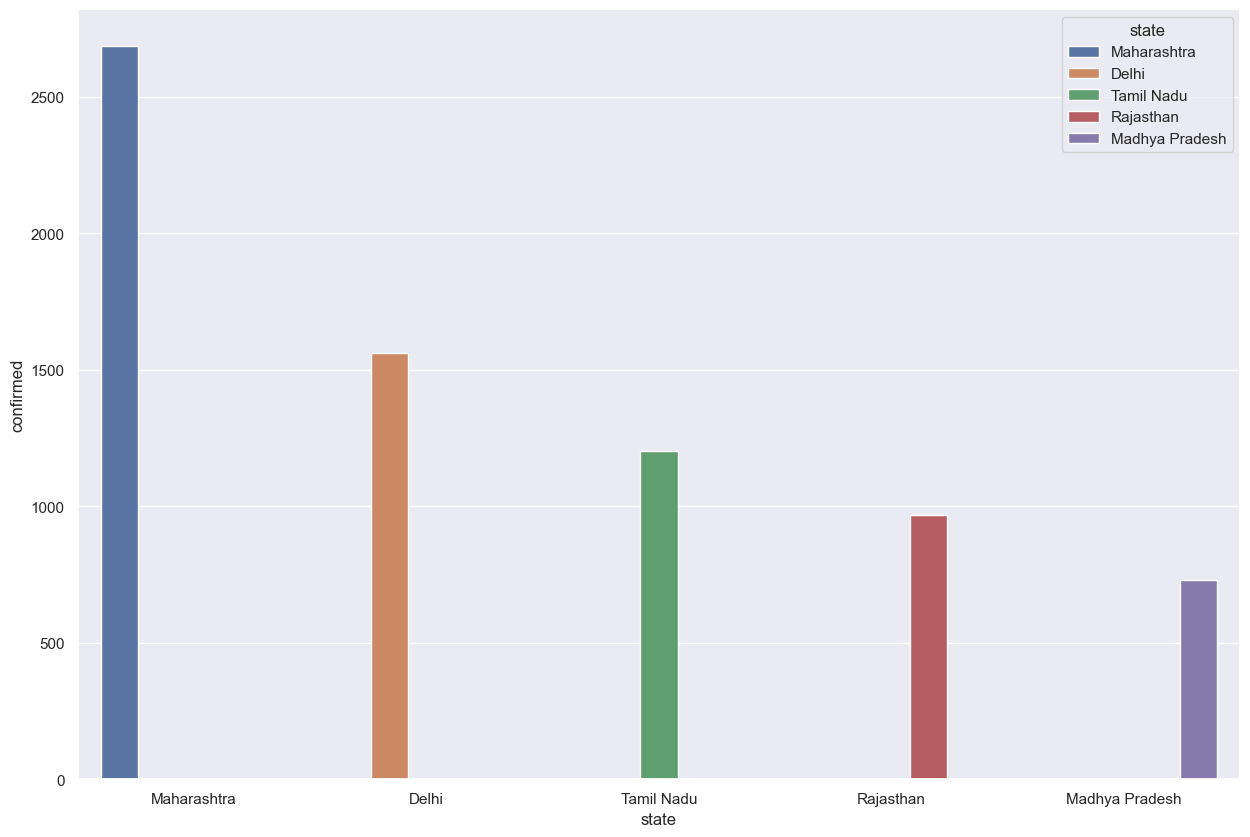

In [61]:
#making bar plot for states with top confirmed cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed, hue="state")
plt.show()

In [62]:
#sorting data w.r.t number of death cases
max_death_cases = today.sort_values(by="deaths",ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
937,2020-04-15,Maharashtra,259,178,2687
936,2020-04-15,Madhya Pradesh,51,50,730
926,2020-04-15,Delhi,30,30,1561
928,2020-04-15,Gujarat,59,28,650
947,2020-04-15,Telengana,100,17,624
944,2020-04-15,Punjab,14,12,176
946,2020-04-15,Tamil Nadu,81,12,1204
933,2020-04-15,Karnataka,71,10,260
920,2020-04-15,Andhra Pradesh,16,9,483
951,2020-04-15,West Bengal,37,7,213


In [63]:
#geeting states with maximum number of death cases
top_states_death = max_death_cases[0:5]

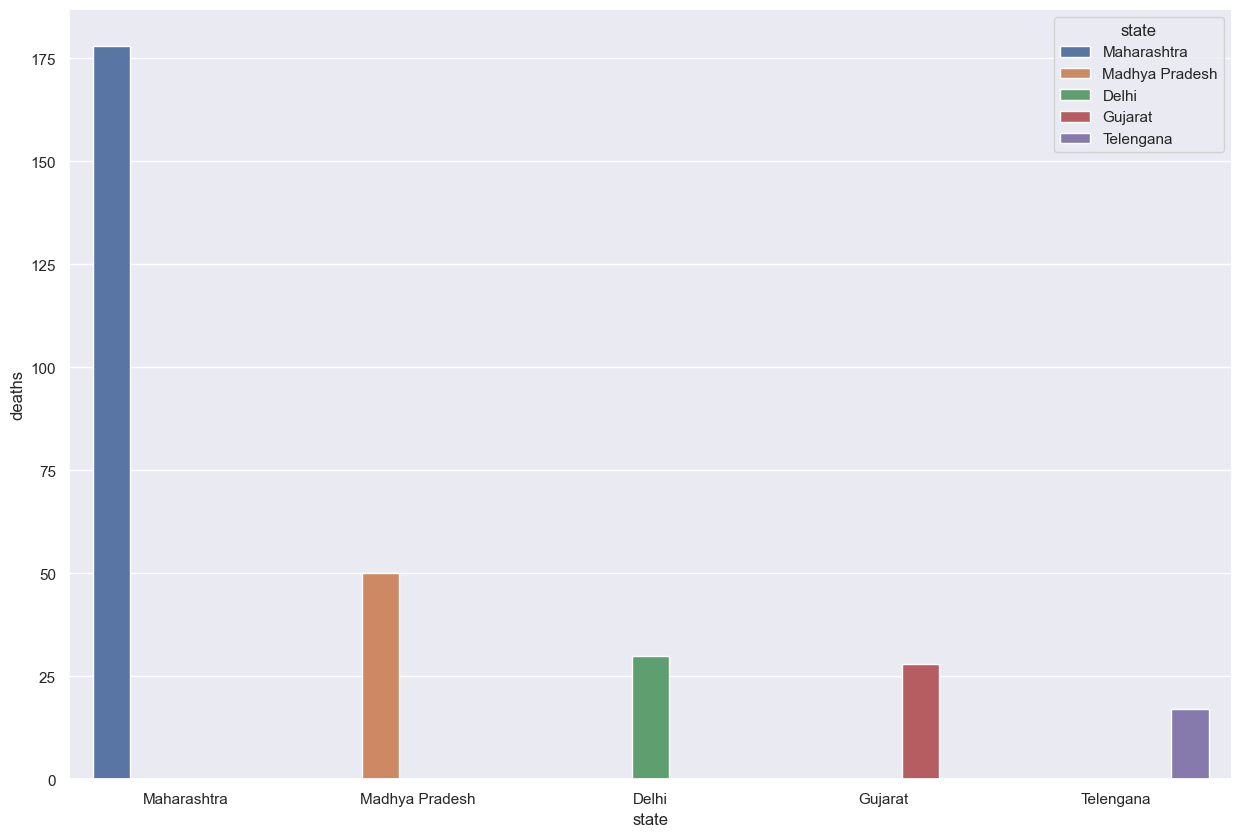

In [64]:
# Making bar plot for states with top death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="deaths",data=top_states_death,hue="state")
plt.show()

In [65]:
#sorting data w.r.t number of cured cases
max_cured_cases = today.sort_values(by="cured", ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
937,2020-04-15,Maharashtra,259,178,2687
934,2020-04-15,Kerala,211,3,387
945,2020-04-15,Rajasthan,147,3,969
947,2020-04-15,Telengana,100,17,624
946,2020-04-15,Tamil Nadu,81,12,1204
933,2020-04-15,Karnataka,71,10,260
928,2020-04-15,Gujarat,59,28,650
936,2020-04-15,Madhya Pradesh,51,50,730
949,2020-04-15,Uttar Pradesh,50,5,660
951,2020-04-15,West Bengal,37,7,213


In [66]:
#Geeting states with maximum number of cured cases
top_states_cured = max_cured_cases[0:5]

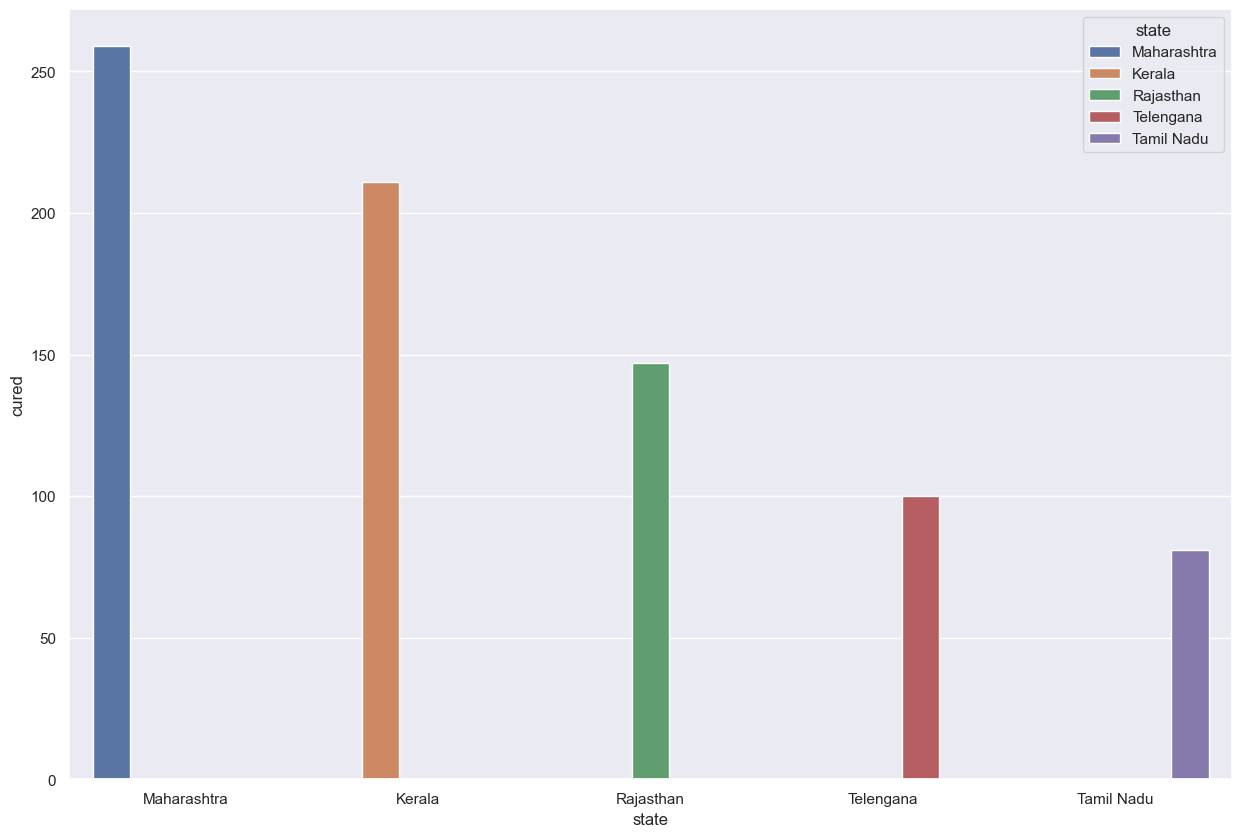

In [67]:
#making bar plot for states with top deaath cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="cured", data=top_states_cured,hue="state")
plt.show()

In [68]:
# Maharashtra
maha = df[df.state=='Maharashtra']

In [69]:
maha

,date,state,cured,deaths,confirmed
77,2020-03-09,Maharashtra,0,0,2
89,2020-03-10,Maharashtra,0,0,5
101,2020-03-11,Maharashtra,0,0,10
114,2020-03-12,Maharashtra,0,0,11
127,2020-03-13,Maharashtra,0,0,11
140,2020-03-14,Maharashtra,0,0,14
153,2020-03-15,Maharashtra,0,0,32
167,2020-03-16,Maharashtra,0,0,32
182,2020-03-17,Maharashtra,0,1,39
197,2020-03-18,Maharashtra,0,1,42


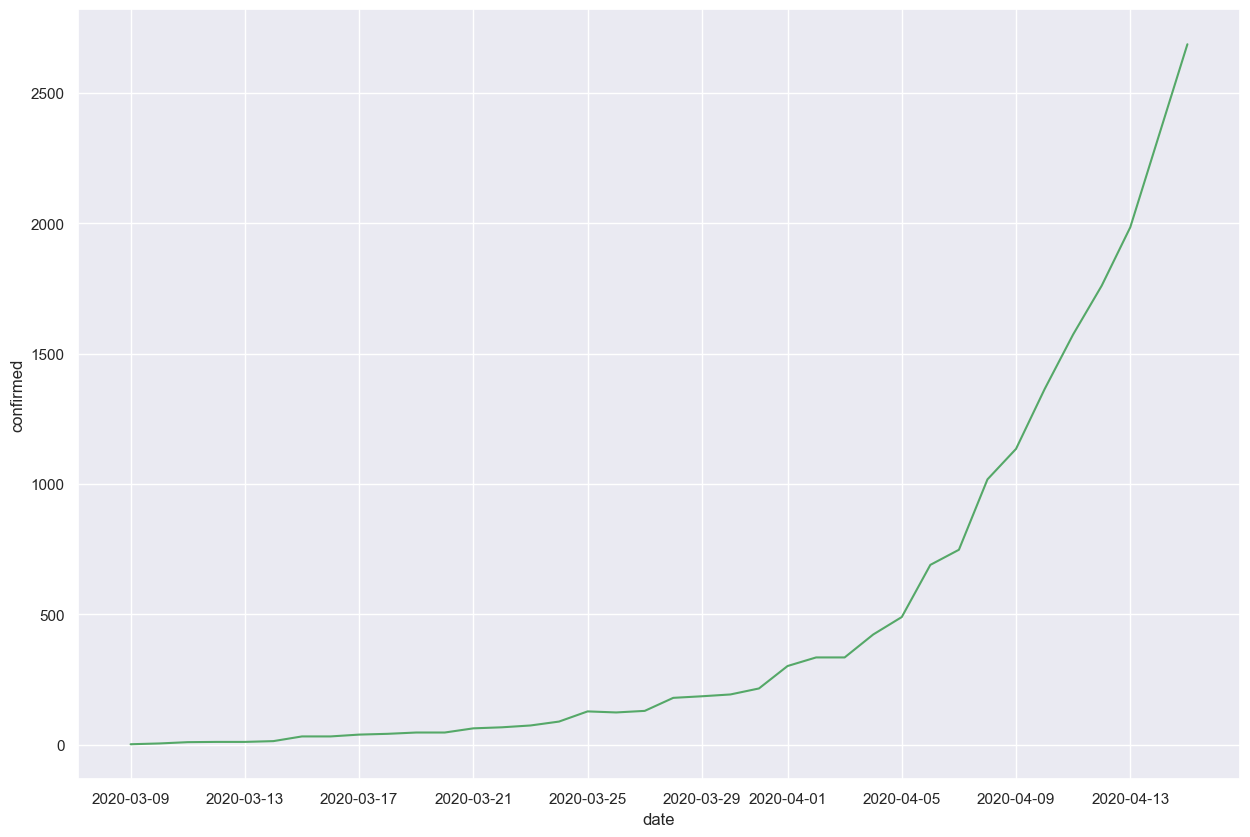

In [70]:
# Visualizing confirmed cases in maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=maha,color="g")
plt.show()

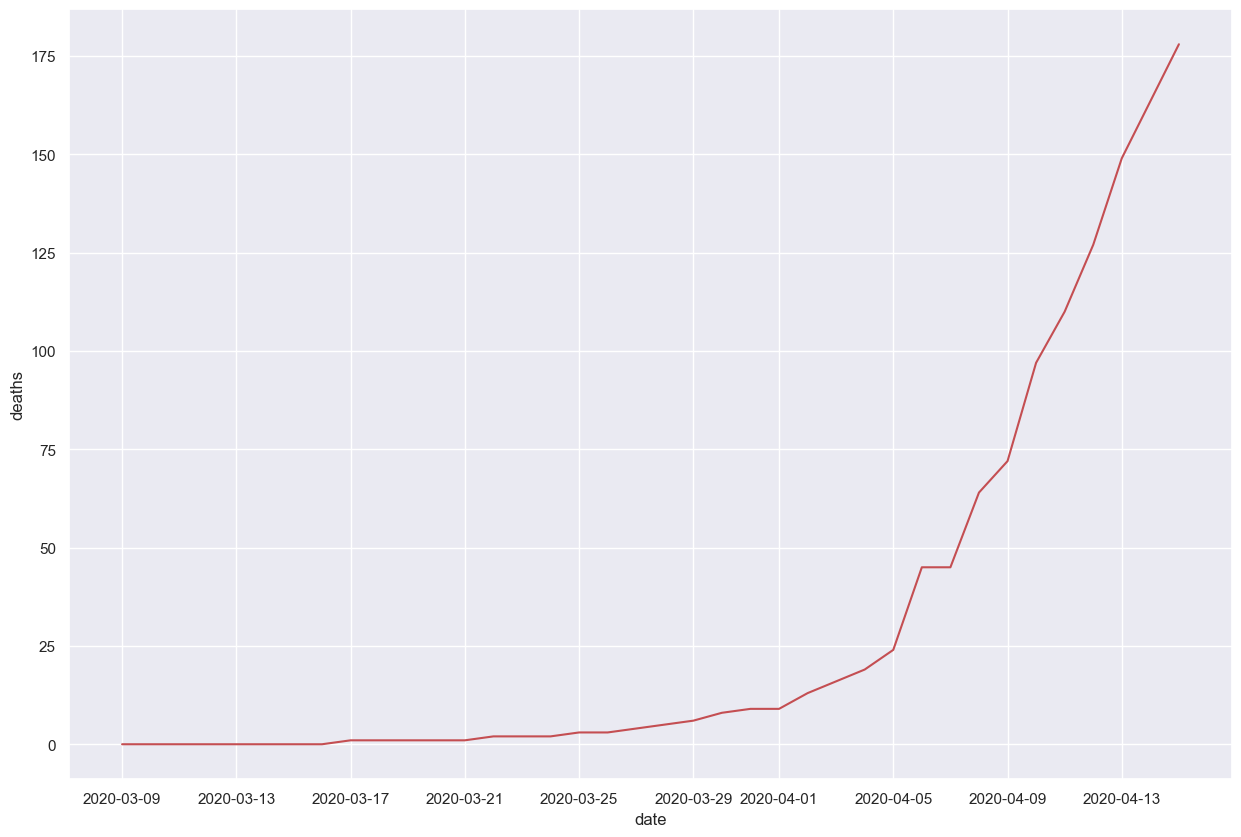

In [71]:
# Visualizing death cases in maharashtra
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="deaths",data=maha,color='r')
plt.show()

In [85]:
 # Linear regression
from sklearn.model_selection import train_test_split

In [86]:
 maha

,date,state,cured,deaths,confirmed
77,2020-03-09,Maharashtra,0,0,2
89,2020-03-10,Maharashtra,0,0,5
101,2020-03-11,Maharashtra,0,0,10
114,2020-03-12,Maharashtra,0,0,11
127,2020-03-13,Maharashtra,0,0,11
140,2020-03-14,Maharashtra,0,0,14
153,2020-03-15,Maharashtra,0,0,32
167,2020-03-16,Maharashtra,0,0,32
182,2020-03-17,Maharashtra,0,1,39
197,2020-03-18,Maharashtra,0,1,42


In [97]:
#converting date-time to ordinal
maha['data']=maha['date'].map(dt.datetime.toordinal)
maha.head()


C:\Users\mohdo\AppData\Local\Temp\ipykernel_11556\3429023822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['data']=maha['date'].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed,data
77,2020-03-09,Maharashtra,0,0,2,737493
89,2020-03-10,Maharashtra,0,0,5,737494
101,2020-03-11,Maharashtra,0,0,10,737495
114,2020-03-12,Maharashtra,0,0,11,737496
127,2020-03-13,Maharashtra,0,0,11,737497


In [93]:
#geeting dependent variable and independent variable
x=maha['date']
y=maha['confirmed']

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr = LinearRegression()

In [101]:
y_train

461     186
601     335
488     193
906    1985
215      47
844    1574
89        5
114      11
353     128
631     423
260      63
813    1364
407     130
782    1135
329      89
720     748
751    1018
101      10
197      42
937    2687
283      67
77        2
182      39
690     690
153      32
Name: confirmed, dtype: int64

In [102]:
lr.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

LinearRegression()

In [103]:
maha.tail()

,date,state,cured,deaths,confirmed,data
813,2020-04-10,Maharashtra,125,97,1364,737525
844,2020-04-11,Maharashtra,188,110,1574,737526
875,2020-04-12,Maharashtra,208,127,1761,737527
906,2020-04-13,Maharashtra,217,149,1985,737528
937,2020-04-15,Maharashtra,259,178,2687,737530


In [104]:
lr.predict(np.array([[2020-4-17]]))

array([[-937415.00031669]])

In [1]:
#THIS IS MODEL IS NOT GIVING THE CORRECT ANSWET DUE TO THE LARGE DIFFERENCE BETWEEN THE TRAINING AND TESTING DATA 